<a href="https://colab.research.google.com/github/rishikadeshmukh/DS2002F24/blob/main/APiLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
import pandas as pd

# API endpoint for fetching universities
url = "http://universities.hipolabs.com/search?country=United%20States"

# Make the GET request
response = requests.get(url)

# Check the status code
if response.status_code == 200:
    print("API request successful!")
else:
    print(f"Failed to retrieve data: {response.status_code}")


API request successful!


In [2]:
# Parse the JSON response
university_data = response.json()

# Pretty-print the first university
print(json.dumps(university_data[0], indent=2))

{
  "domains": [
    "marywood.edu"
  ],
  "alpha_two_code": "US",
  "web_pages": [
    "http://www.marywood.edu"
  ],
  "name": "Marywood University",
  "state-province": null,
  "country": "United States"
}


In [4]:
df = pd.DataFrame(university_data)
df.head()
df

,domains,alpha_two_code,web_pages,name,state-province,country
0,[marywood.edu],US,[http://www.marywood.edu],Marywood University,None,United States
1,[lindenwood.edu],US,[http://www.lindenwood.edu/],Lindenwood University,None,United States
2,[sullivan.edu],US,[https://sullivan.edu/],Sullivan University,None,United States
3,[fscj.edu],US,[https://www.fscj.edu/],Florida State College at Jacksonville,None,United States
4,[xavier.edu],US,[https://www.xavier.edu/],Xavier University,None,United States
...,...,...,...,...,...,...
2329,[vermontlaw.edu],US,[https://www.vermontlaw.edu/],Vermont Law School,None,United States
2330,[wnc.edu],US,[https://wnc.edu/],Western Nevada College,None,United States
2331,[westernu.edu],US,[https://www.westernu.edu/],Western University of Health Sciences,None,United States
2332,[stmarytx.edu],US,[https://www.stmarytx.edu/],St. Mary's University,Texas,United States


In [5]:
state_counts= df['state-province'].value_counts()
state_counts

,count
state-province,
Pennsylvania,31
NY,9
California,5
Texas,5
"New York, NY",4
New York,3
Florida,3
North Carolina,3
Michigan,3


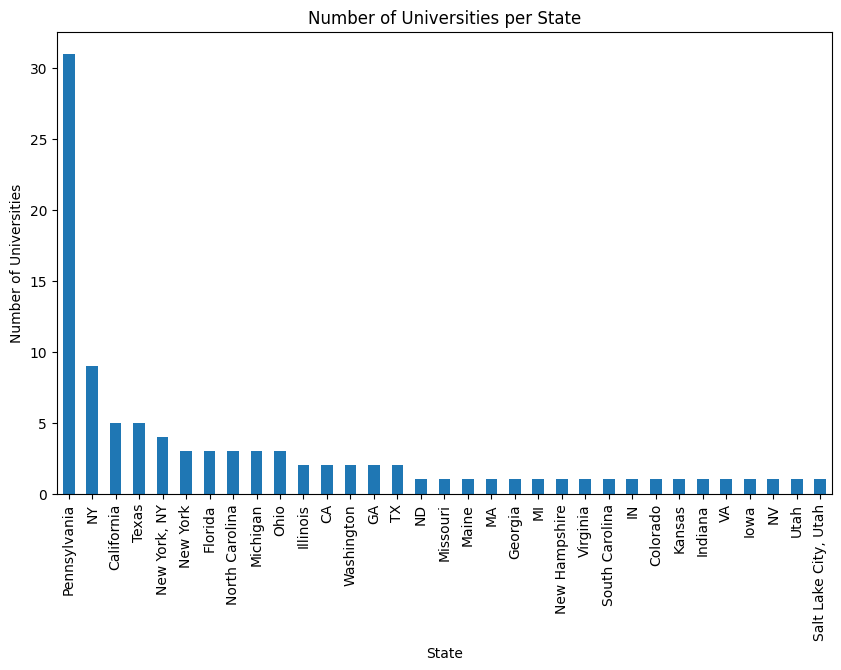

In [6]:
import matplotlib.pyplot as plt

# Plot the number of universities per state
state_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Number of Universities per State")
plt.xlabel("State")
plt.ylabel("Number of Universities")
plt.show()

In [7]:

countries = ["United States", "Canada", "Australia", "United Kingdom"]
university_list = []

for country in countries:
    response = requests.get(f"http://universities.hipolabs.com/search?country={country}")
    data = response.json()

    for uni in data:
        uni['country'] = country
        university_list.append(uni)

# Convert to DataFrame
df_universities = pd.DataFrame(university_list)

# Display the first few rows
print(df_universities.head())

            domains alpha_two_code                     web_pages  \
0    [marywood.edu]             US     [http://www.marywood.edu]   
1  [lindenwood.edu]             US  [http://www.lindenwood.edu/]   
2    [sullivan.edu]             US       [https://sullivan.edu/]   
3        [fscj.edu]             US       [https://www.fscj.edu/]   
4      [xavier.edu]             US     [https://www.xavier.edu/]   

                                    name state-province        country  
0                    Marywood University           None  United States  
1                  Lindenwood University           None  United States  
2                    Sullivan University           None  United States  
3  Florida State College at Jacksonville           None  United States  
4                      Xavier University           None  United States  


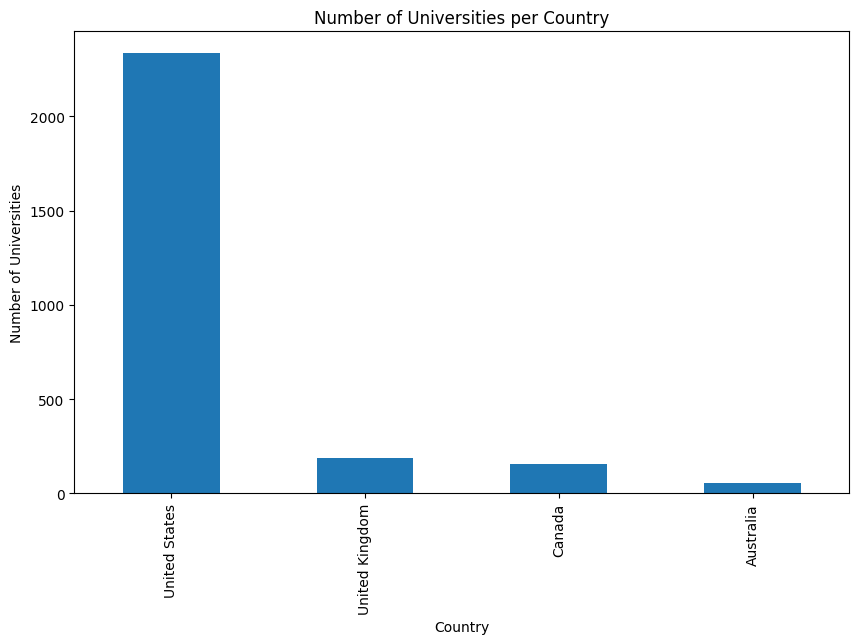

In [8]:
# Count the number of universities per country
country_counts = df_universities['country'].value_counts()

# Plot the data
country_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Number of Universities per Country")
plt.xlabel("Country")
plt.ylabel("Number of Universities")
plt.show()

In [27]:
import json
import pandas as pd
import json
import requests

#get stock from the user
stock=input()

AAPL


In [28]:
print("The Stock we will research is:" + stock)

The Stock we will research is:AAPL


In [29]:
apikey="api key"

url = "https://yfapi.net/v6/finance/quote?region=US&lang=en&symbols=AAPL%2CBTC-USD%2CEURUSD%3DX"

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"quoteResponse":{"result":[{"language":"en-US","region":"US","quoteType":"EQUITY","typeDisp":"Equity","quoteSourceName":"Nasdaq Real Time Price","triggerable":true,"customPriceAlertConfidence":"HIGH","currency":"USD","regularMarketChangePercent":0.11866606,"regularMarketPrice":227.79,"exchange":"NMS","shortName":"Apple Inc.","longName":"Apple Inc.","messageBoardId":"finmb_24937","exchangeTimezoneName":"America/New_York","market":"us_market","marketState":"POST","exchangeTimezoneShortName":"EDT","gmtOffSetMilliseconds":-14400000,"esgPopulated":false,"postMarketPrice":227.184,"postMarketChange":-0.60598755,"regularMarketChange":0.269989,"regularMarketTime":1727467204,"regularMarketDayHigh":229.52,"regularMarketDayRange":"227.3 - 229.52","regularMarketDayLow":227.3,"regularMarketVolume":33706549,"regularMarketPreviousClose":227.52,"bid":227.59,"ask":240.09,"bidSize":5,"askSize":1,"fullExchangeName":"NasdaqGS","financialCurrency":"USD","regularMarketOpen":228.43,"averageDailyVolume3Month"

In [30]:
stock_json = response.json()
print(stock_json['quoteResponse']['result'][0]["longName"] + " Price:$" + str(stock_json['quoteResponse']['result'][0]["regularMarketPrice"]))


Apple Inc. Price:$227.79


In [31]:
import requests

stocks = input("Enter the stock symbols separated by commas: ")
stock_symbols = stocks.replace(" ", "")

apikey = "api key"
url = "https://yfapi.net/v6/finance/quote?region=US&lang=en&symbols=AAPL%2CBTC-USD%2CEURUSD%3DX"

querystring = {"symbols": stock_symbols}

headers = {
    'x-api-key': apikey
}


response = requests.request("GET", url, headers=headers, params=querystring)

print(response.json())


Enter the stock symbols separated by commas: AAPL,MSFT
{'quoteResponse': {'result': [{'language': 'en-US', 'region': 'US', 'quoteType': 'EQUITY', 'typeDisp': 'Equity', 'quoteSourceName': 'Nasdaq Real Time Price', 'triggerable': True, 'customPriceAlertConfidence': 'HIGH', 'currency': 'USD', 'marketState': 'POST', 'exchange': 'NMS', 'shortName': 'Apple Inc.', 'longName': 'Apple Inc.', 'messageBoardId': 'finmb_24937', 'exchangeTimezoneName': 'America/New_York', 'exchangeTimezoneShortName': 'EDT', 'gmtOffSetMilliseconds': -14400000, 'market': 'us_market', 'esgPopulated': False, 'regularMarketChangePercent': 0.11866606, 'regularMarketPrice': 227.79, 'earningsTimestamp': 1722544200, 'earningsTimestampStart': 1730372340, 'earningsTimestampEnd': 1730721600, 'earningsCallTimestampStart': 1722546000, 'earningsCallTimestampEnd': 1722546000, 'isEarningsDateEstimate': True, 'trailingAnnualDividendRate': 0.97, 'trailingPE': 34.724083, 'dividendRate': 1.0, 'trailingAnnualDividendYield': 0.0042633615,

Enter the country for which you'd like to fetch university data: Canada
Universities in Canada:
Toronto Baptist Seminary and Bible College - Domain: tbs.edu
Cégep de Saint-Jérôme - Domain: cstj.qc.ca
Lambton College - Domain: lambtoncollege.ca
Acadia University - Domain: acadiau.ca
Algonquin College - Domain: algonquincollege.com
Ashton College - Domain: ashtoncollege.com
Assumption University - Domain: assumptionu.ca
Athabasca University - Domain: athabascau.ca
Augustana University College - Domain: augustana.ab.ca
British Columbia Institute of Technology - Domain: bcit.ca
British Columbia Open University - Domain: bcou.ca
William and Catherine Booth College - Domain: boothcollege.ca
Collège Boréal - Domain: borealc.on.ca
Bow Valley College - Domain: bowvalleycollege.ca
Brandon University - Domain: brandonu.ca
Brock University - Domain: brocku.ca
DeVry Institute of Technology - Domain: cal.devry.ca
Camosun College - Domain: camosun.bc.ca
Capilano College - Domain: capcollege.bc.ca
Uni

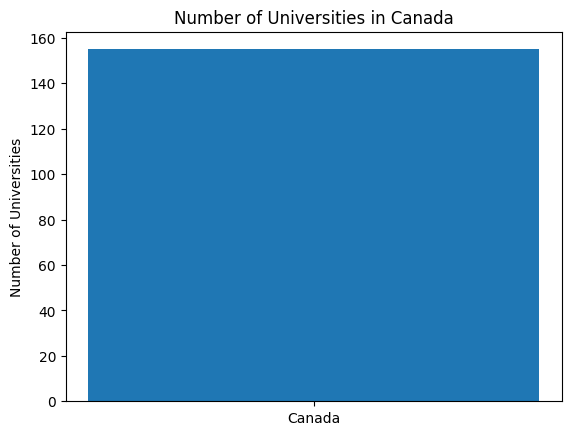

In [23]:
import requests
import matplotlib.pyplot as plt

country = input("Enter the country for which you'd like to fetch university data: ")
url = f"http://universities.hipolabs.com/search?country={country}"

response = requests.get(url)
data = response.json()
universities = [uni['name'] for uni in data]
domains = [uni['domains'][0] for uni in data]

print(f"Universities in {country}:")
for name, domain in zip(universities, domains):
    print(f"{name} - Domain: {domain}")

country_count = len(universities)
plt.bar([country], [country_count])
plt.ylabel("Number of Universities")
plt.title(f"Number of Universities in {country}")
plt.show()